<a href="https://colab.research.google.com/github/Wisley1/NonMod_siRNA_LightGBM/blob/master/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Wisley1/NovabiomStat

Cloning into 'NovabiomStat'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 613.84 KiB | 4.15 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [4]:
# @title data
taxon_final = pd.read_csv('/content/NovabiomStat/final_bacteria_health.csv')
taxon140 = pd.read_csv('/content/NovabiomStat/final_bacteria_ibs_140.csv')
taxon141 = pd.read_csv('/content/NovabiomStat/final_bacteria_ibs_141.csv')

info_final = pd.read_csv('/content/NovabiomStat/final_health_statistic - final_health_statistic.csv.csv')
info140 = pd.read_csv('/content/NovabiomStat/final_ibs_140_statistic - final_ibs_140_statistic.csv.csv')
info141 = pd.read_csv('/content/NovabiomStat/final_ibs_141_statistic - final_ibs_141_statistic.csv.csv')


In [5]:
# @title distribution

def distribution(dt, col):
  x = str(col)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 8), sharex=False, sharey=False)
  fig.suptitle(x, fontsize=20)

  ax[0].title.set_text('distribution')
  variable = np.log(dt[x]) # логарифмируем значения
  sns.histplot(variable, kde=True, element='step', fill=True, alpha=.5, ax=ax[0])
  des = np.log(dt[x].describe()) # логарифмируем описательные статистики
  ax[0].axvline(des["25%"], ls='--')
  ax[0].axvline(des["mean"], ls='--')
  ax[0].axvline(des["75%"], ls='--')
  ax[0].grid(True)
  des = round(des, 2).apply(lambda x: str(x))
  box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
  ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

  ax[1].title.set_text('outliers')
  tmp_dtf = pd.DataFrame(dt[x])
  tmp_dtf[x] = np.log(tmp_dtf[x].fillna(tmp_dtf[x].mean())) # логарифмируем значения
  tmp_dtf.boxplot(column=x, ax=ax[1])
  print(plt.show())

In [6]:
taxon140['patient_ID']. isin (info140['patient_ID']). value_counts () #совпали все

True    74
Name: patient_ID, dtype: int64

In [7]:
taxon_final.isna().sum().sum()

0

In [8]:
taxon140.shape

(74, 2567)

In [9]:
info140.describe()

,Seq_date,Main_Disease,Birth_Year,Age,Age_min,Age_max,Weight_kg,Height_cm
count,74.000000,74.0,9.000000,14.000000,60.0,60.0,8.00000,9.000000
mean,2015.743243,140.0,1976.666667,44.071429,28.0,50.0,64.25000,170.000000
std,1.744351,0.0,11.067972,12.803030,0.0,0.0,13.28533,9.785193
min,2015.000000,140.0,1963.000000,24.000000,28.0,50.0,48.00000,158.000000
25%,2015.000000,140.0,1969.000000,34.500000,28.0,50.0,53.00000,162.000000
50%,2015.000000,140.0,1972.000000,49.000000,28.0,50.0,64.00000,168.000000
75%,2015.000000,140.0,1982.000000,49.000000,28.0,50.0,75.50000,180.000000
max,2021.000000,140.0,1994.000000,67.000000,28.0,50.0,80.00000,185.000000


In [10]:
taxon140.iloc[:, 1:]

01D2Z36_F  0319-6G20_O  0319-7L14_O  09D2Z48_F  2013Ark19i_G  37-13_F  \
0         0.0          0.0          0.0        0.0           0.0      0.0   
1         0.0          0.0          0.0        0.0           0.0      0.0   
2         0.0          0.0          0.0        0.0           0.0      0.0   
3         0.0          0.0          0.0        0.0           0.0      0.0   
4         0.0          0.0          0.0        0.0           0.0      0.0   
..        ...          ...          ...        ...           ...      ...   
69        0.0          0.0          0.0        0.0           0.0      0.0   
70        0.0          0.0          0.0        0.0           0.0      0.0   
71        0.0          0.0          0.0        0.0           0.0      0.0   
72        0.0          0.0          0.0        0.0           0.0      0.0   
73        0.0          0.0          0.0        0.0           0.0      0.0   

    4-29_C  67-14_F  966-1_G  9M32_G  A0839_F  A21b_F      A2_G  A4b_F  \
0      0.0      0.0      0.0     0.0      0.0     0.0  0.060000   0.01   
1      0.0      0.0      0.0     0.0      0.0     0.0  0.070000   0.00   
2      0.0      0.0      0.0     0.0      0.0     0.0  0.040000   0.00   
3      0.0      0.0      0.0     0.0      0.0     0.0  0.030000   0.00   
4      0.0      0.0      0.0     0.0      0.0     0.0  0.070000   0.00   
..     ...      ...      ...     ...      ...     ...       ...    ...   
69     0.0      0.0      0.0     0.0      0.0     0.0  0.000000   0.00   
70     0.0      0.0      0.0     0.0      0.0     0.0  0.000000   0.00   
71     0.0      0.0      0.0     0.0      0.0     0.0  0.010099   0.00   
72     0.0      0.0      0.0     0.0      0.0     0.0  0.000000   0.00   
73     0.0      0.0      0.0     0.0      0.0     0.0  0.000000   0.00   

    AAP99_G  AB1_F    ABY1_C  AD3_C  AEGEAN-169 marine group_F  \
0       0.0    0.0  0.000000    0.0                        0.0   
1       0.0    0.0  0.000000    0.0                        0.0   
2       0.0    0.0  0.000000    0.0                        0.0   
3       0.0    0.0  0.000000    0.0                        0.0   
4       0.0    0.0  0.000000    0.0                        0.0   
..      ...    ...       ...    ...                        ...   
69      0.0    0.0  0.000000    0.0                        0.0   
70      0.0    0.0  0.010312    0.0                        0.0   
71      0.0    0.0  0.000000    0.0                        0.0   
72      0.0    0.0  0.000000    0.0                        0.0   
73      0.0    0.0  0.000000    0.0                        0.0   

    AKAU3564 sediment group_F  AKYH767_F  ASF356_G  AT-s3-28_C  AT-s3-44_O  \
0                         0.0        0.0      0.00         0.0         0.0   
1                         0.0        0.0      0.00         0.0         0.0   
2                         0.0        0.0      0.00         0.0         0.0   
3                         0.0        0.0      0.00         0.0         0.0   
4                         0.0        0.0      0.01         0.0         0.0   
..                        ...        ...       ...         ...         ...   
69                        0.0        0.0      0.00         0.0         0.0   
70                        0.0        0.0      0.00         0.0         0.0   
71                        0.0        0.0      0.00         0.0         0.0   
72                        0.0        0.0      0.00         0.0         0.0   
73                        0.0        0.0      0.00         0.0         0.0   

    Abditibacteria_C  Abditibacteriaceae_F  Abditibacteriales_O  \
0                0.0                   0.0                  0.0   
1                0.0                   0.0                  0.0   
2                0.0                   0.0                  0.0   
3                0.0                   0.0                  0.0   
4                0.0                   0.0                  0.0   
..               ...                   ...                

In [11]:
taxon140 = taxon140.drop(taxon140.iloc[:, 1:].columns[taxon140.iloc[:, 1:].apply(lambda col: col.eq(0).all())], axis=1)
taxon141 = taxon141.drop(taxon141.iloc[:, 1:].columns[taxon141.iloc[:, 1:].apply(lambda col: col.eq(0).all())], axis=1)
taxon_final = taxon_final.drop(taxon_final.iloc[:, 1:].columns[taxon_final.iloc[:, 1:].apply(lambda col: col.eq(0).all())], axis=1)

In [12]:
print(taxon140.shape)
print(taxon141.shape)
print(taxon_final.shape)

(74, 1163)
(170, 1680)
(211, 2185)


In [13]:
taxon140.describe()

01D2Z36_F       A2_G      A4b_F     ABY1_C   ASF356_G  \
count  74.000000  74.000000  74.000000  74.000000  74.000000   
mean    0.000408   0.030863   0.393441   0.000276   0.000679   
std     0.002000   0.030285   0.394058   0.001668   0.002539   
min     0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.010080   0.085585   0.000000   0.000000   
50%     0.000000   0.030131   0.266766   0.000000   0.000000   
75%     0.000000   0.040226   0.598801   0.000000   0.000000   
max     0.010093   0.170803   1.632077   0.010312   0.010084   

       Acetanaerobacterium_G  Acetatifactor_G  Acetitomaculum_G  \
count              74.000000        74.000000         74.000000   
mean                0.000829         0.020302          0.023251   
std                 0.005037         0.166509          0.025544   
min                 0.000000         0.000000          0.000000   
25%                 0.000000         0.000000          0.010069   
50%                 0.000000         0.000000          0.020045   
75%                 0.000000         0.000000          0.027714   
max                 0.041250         1.432029          0.130000   

       Acetivibrio_G  Acetobacteraceae_F  Acetobacterales_O  Acetobacterium_G  \
count      74.000000           74.000000          74.000000         74.000000   
mean        0.000275            0.000412           0.000412          0.000412   
std         0.001663            0.002633           0.002633          0.002019   
min         0.000000            0.000000           0.000000          0.000000   
25%         0.000000            0.000000           0.000000          0.000000   
50%         0.000000            0.000000           0.000000          0.000000   
75%         0.000000            0.000000           0.000000          0.000000   
max         0.010312            0.020402           0.020402          0.010312   

       Acholeplasma_G  Acholeplasmataceae_F  Acholeplasmatales_O  \
count       74.000000             74.000000            74.000000   
mean         0.000946              0.032524             0.032524   
std          0.007055              0.202949             0.202949   
min          0.000000              0.000000             0.000000   
25%          0.000000              0.000000             0.000000   
50%          0.000000              0.000000             0.000000   
75%          0.000000              0.000000             0.000000   
max          0.060000              1.732997             1.732997   

       Achromobacter_G  Acidaminobacter_G  Acidaminobacteraceae_F  \
count        74.000000          74.000000               74.000000   
mean          0.000408           0.000136                0.000136   
std           0.002001           0.001168                0.001168   
min           0.000000           0.000000                0.000000   
25%           0.000000           0.000000                0.000000   
50%           0.000000           0.000000                0.000000   
75%           0.000000           0.000000                0.000000   
max           0.010086           0.010050                0.010050   

       Acidaminococcaceae_F  Acidaminococcales_O  Acidaminococcus_G  \
count             74.000000            74.000000          74.000000   
mean               0.188170             0.188170           0.008018   
std                0.394112             0.394112           0.026916   
min                0.000000             0.000000           0.000000   
25%                0.010000             0.010000           0.000000   
50%                0.060356             0.060356           0.000000   
75%                0.178417             0.178417           0.010077   
max                2.760427             2.760427           0.220000   

       Acidibacter_G  Acidimicrobiia_C  Acidobacteriae_C  Acidobacteriota_P  \
count      74.000000         74.000000         74.000000          74.000000   
mean        0.000136          0.000544          0.001763       

In [14]:
mean_df140 = pd.DataFrame()
mean_df140['mean'] = taxon140.mean(axis=0)
mean_df141 = pd.DataFrame()
mean_df141['mean'] = taxon141.mean(axis=0)
mean_df_final = pd.DataFrame()
mean_df_final['mean'] = taxon_final.mean(axis=0)

<ipython-input-14-5fe0bc845a6b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_df140['mean'] = taxon140.mean(axis=0)
<ipython-input-14-5fe0bc845a6b>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_df141['mean'] = taxon141.mean(axis=0)
<ipython-input-14-5fe0bc845a6b>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to

In [15]:
mean_df140.sort_values(by=['mean'], ascending=False)

,mean
Bacteria,99.852838
Firmicutes_P,50.143095
Clostridia_C,45.656494
Bacteroidota_P,33.910551
Bacteroidia_C,33.901553
...,...
Aliivibrio_G,0.000135
Aeribacillus_G,0.000135
Skermanella_G,0.000135
Arthrobacter_G,0.000135


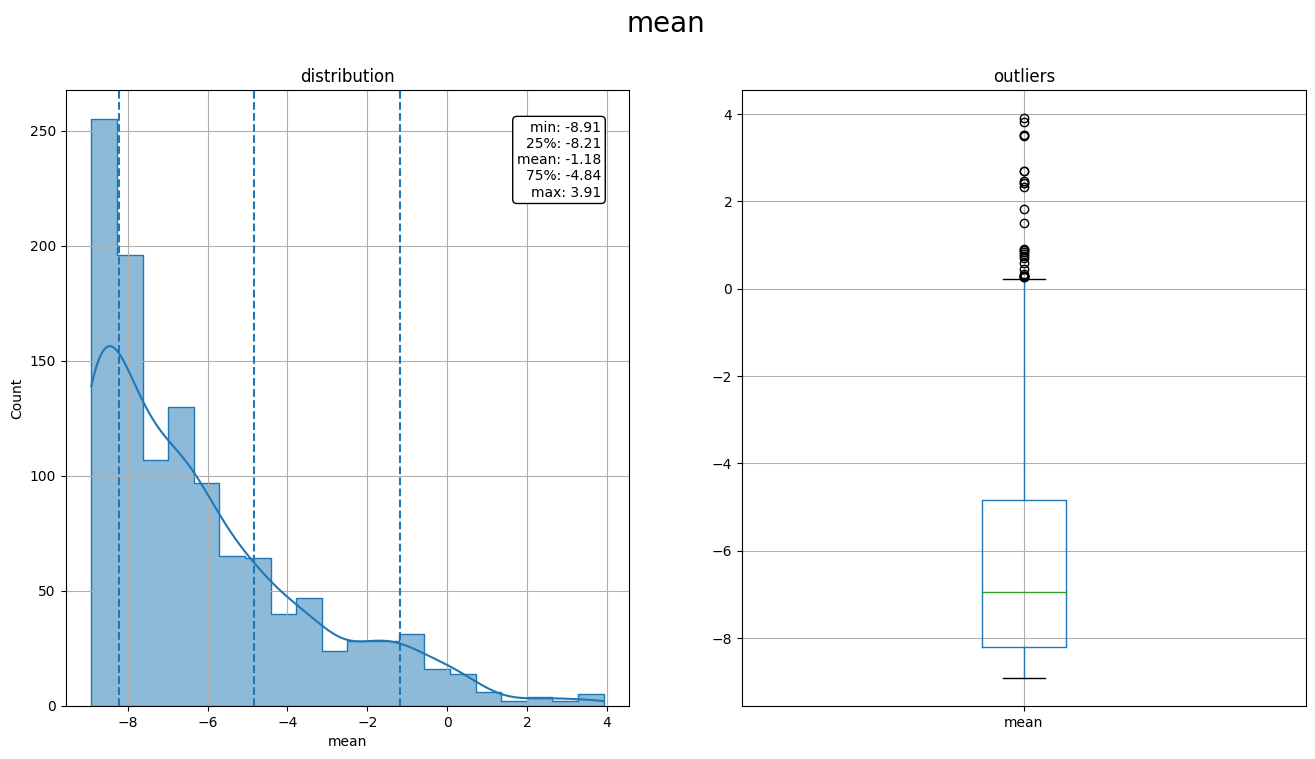

None


In [16]:
distribution(mean_df140.drop(index='Bacteria'), 'mean')

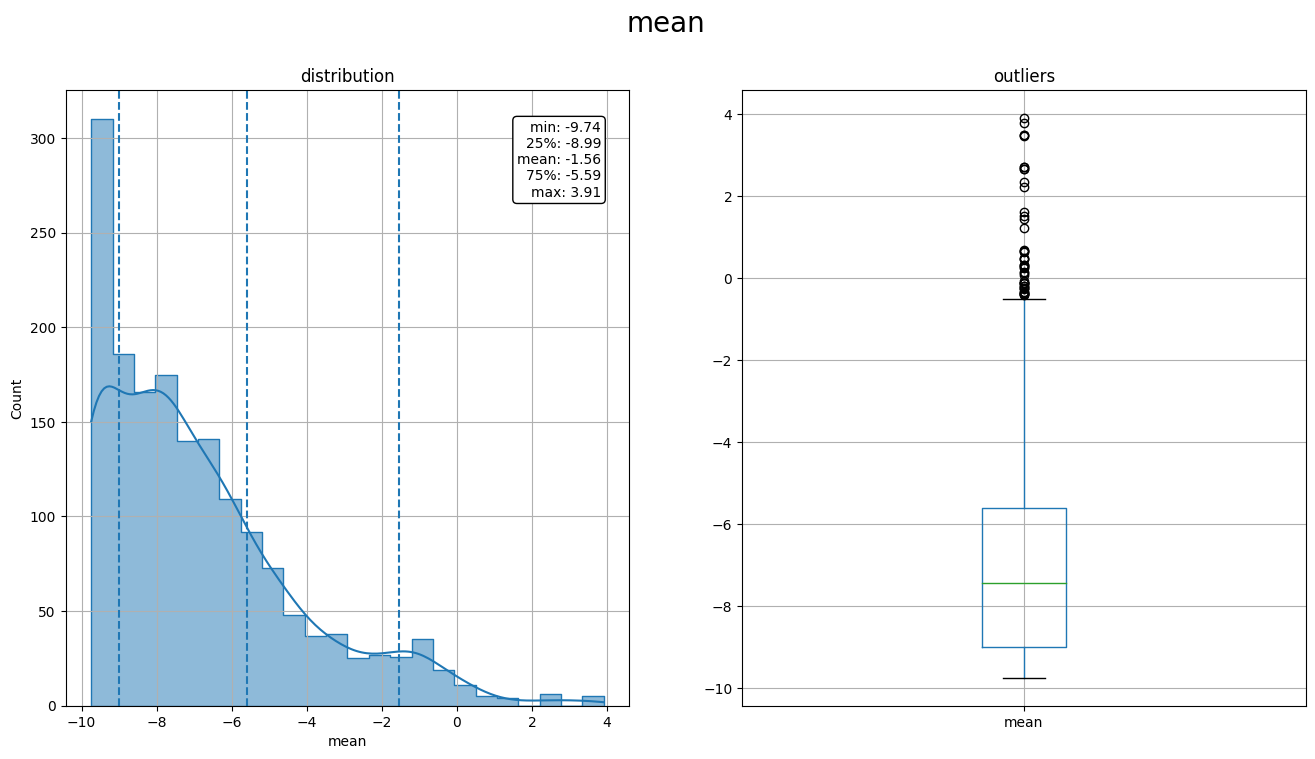

None


In [17]:
distribution(mean_df141.drop(index='Bacteria'), 'mean')

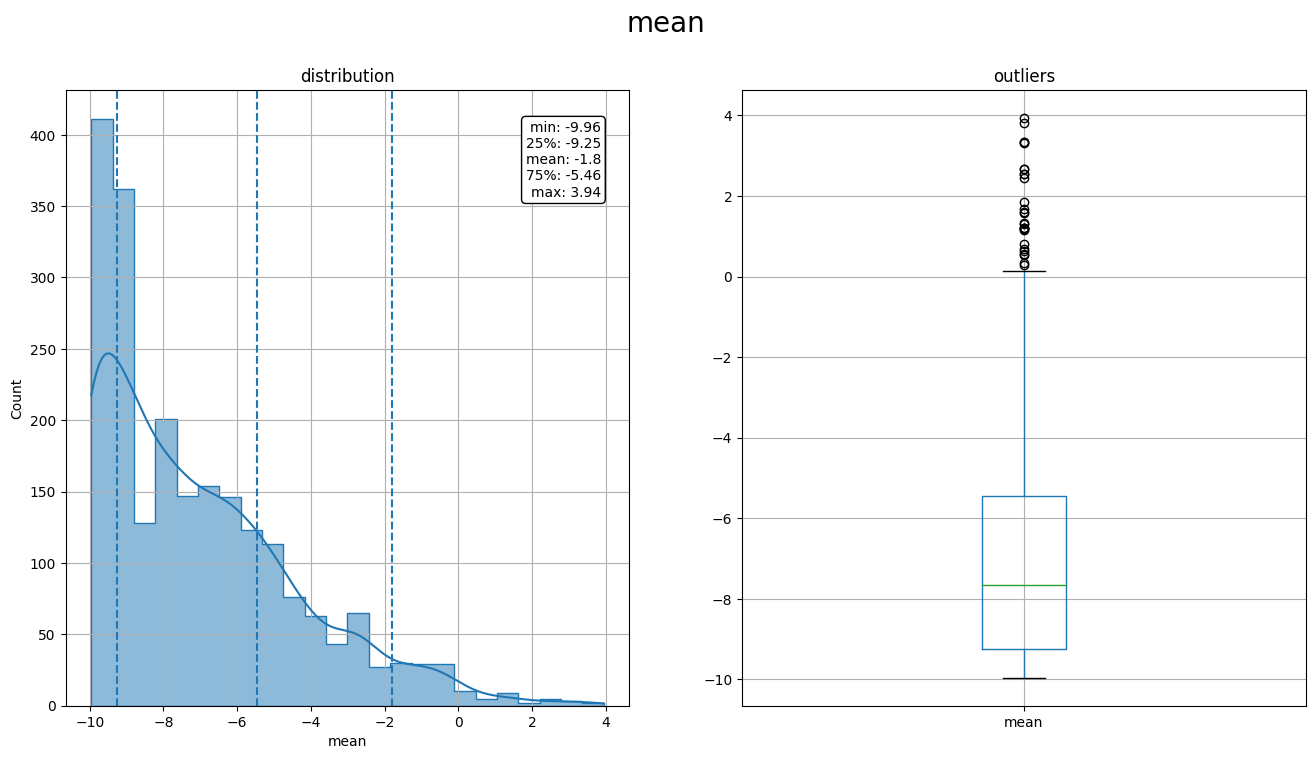

None


In [18]:
distribution(mean_df_final.drop(index='Bacteria'), 'mean')

In [19]:
# @title normal/opposite of normal
from scipy.stats import shapiro

normal_list140 = []
not_normal_list140 = []

normal_list141 = []
not_normal_list141 = []

normal_list_final = []
not_normal_list_final = []

for col in taxon140.columns[1:]:
    stat, p = shapiro(taxon140[col])
    alpha = 0.05
    if p > alpha:
        normal_list140.append(col)
    else:
        not_normal_list140.append(col)

for col in taxon141.columns[1:]:
    stat, p = shapiro(taxon141[col])
    alpha = 0.05
    if p > alpha:
        normal_list141.append(col)
    else:
        not_normal_list141.append(col)

for col in taxon_final.columns[1:]:
    stat, p = shapiro(taxon_final[col])
    alpha = 0.05
    if p > alpha:
        normal_list_final.append(col)
    else:
        not_normal_list_final.append(col)

In [ ]:
result140 = {}
result141 = {}
result_final = {}
for col_name in taxon140.iloc[:, 1:].keys():
    last_letter = col_name[-1]
    if last_letter not in result140:
        result140[last_letter] = []
    result140[last_letter].append(col_name)

for col_name in taxon141.iloc[:, 1:].keys():
    last_letter = col_name[-1]
    if last_letter not in result141:
        result141[last_letter] = []
    result141[last_letter].append(col_name)

for col_name in taxon_final.iloc[:, 1:].keys():
    last_letter = col_name[-1]
    if last_letter not in result_final:
        result_final[last_letter] = []
    result_final[last_letter].append(col_name)

result140

In [ ]:
from scipy.stats import mannwhitneyu

# Проводим тест Манна-Уитни между каждым столбцом в рамках одного ключа
significant_pairs140 = []
for key in result140:
    cols = result140[key]
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            col1 = cols[i]
            col2 = cols[j]
            stat, p = mannwhitneyu(taxon140[col1], taxon140[col2])
            if p < 0.05:
                significant_pairs140.append((col1, col2))
            print(f'Test for {col1} and {col2}:')
            print(f'statistic={stat}, p-value={p}')
print('Significant pairs:', significant_pairs140)